# <font color=#FF1493>Bio-Inspired Learning</font>

## <font color=#FF69B4>Genetic Algorithm to find the maximun of a function with two variables:</font>
*  f(x1,x2) = x1^2 + x2^2
*  with x1 and x2 in the range [-5,5]

---
* #### <font color=#F5F5D6>This Notebooks implements the ideas and code in [introduction-to-genetic-algorithms-in-python](
https://algodaily.com/lessons/introduction-to-genetic-algorithms-in-python)
</font>
---
---
### <font color=#C0C0C0>Master of Science in Signal Theory and Communications (MUTSC)</font>
### *Signal processing and machine learning for big data*
## <font color=orange>ETSIT - UPM</font>
---



## Define and plot this simple fitness_function
* ### The fitness_function evaluates each individial (SOLUTION) in the population

In [1]:
import numpy as np

# fitness_function for a list of individuals or solutions
def fitness_function(solution):
    return np.sum(np.array(solution)*np.array(solution), axis=1)


In [2]:
# example: solution = individual
solution = [[0.5, 4.4], [4.5, -4]]

print('fitness function for solutions: ', solution, 'values: ', fitness_function(solution))

fitness function for solutions:  [[0.5, 4.4], [4.5, -4]] values:  [19.61 36.25]


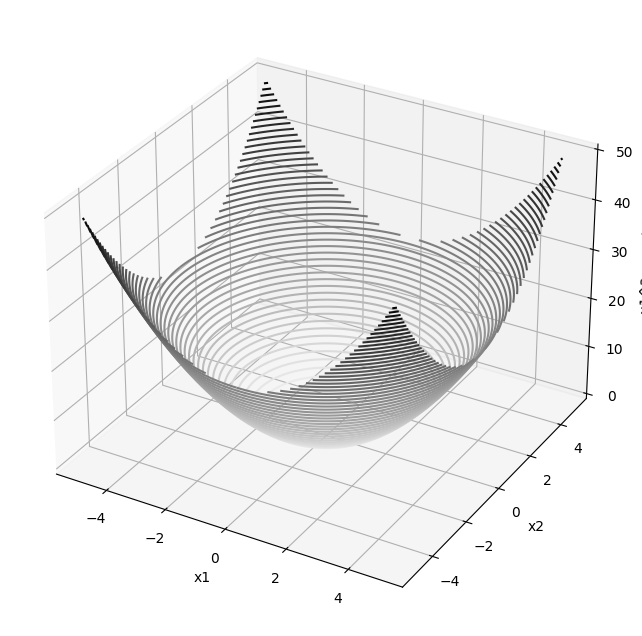

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D

fitness = [[ fitness_function([[x1, x2]])[0]   for x1 in np.arange(-5, 5, 0.01)] for x2 in np.arange(-5, 5, 0.01)]

x1 = np.arange(-5, 5, 0.01)
x2 = np.arange(-5, 5, 0.01)

X1, X2 = np.meshgrid(x1, x2)

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.contour3D(X1, X2, fitness, 50, cmap='binary')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x1^2 + x2^2');

### Define some parameters for our GA



In [4]:
genes = 2
chromosomes = 10
lb = -5
ub = 5
populationSize = (chromosomes, genes)
generations = 10
mattingPoolSize = 6
offspringSize = populationSize[0] - mattingPoolSize

* ## Random initialization of the population

> We are assuming that x1 and x2 are continuous variables and both can have value in the range [-5, 5].






In [5]:
import numpy
population = numpy.random.uniform(lb, ub, populationSize)

print(population)

[[-3.1265098   4.62464168]
 [ 2.97387332 -1.50966737]
 [ 1.25316419  4.12471512]
 [ 0.39031982  3.09014325]
 [ 0.8846152  -3.63657165]
 [ 3.16773077 -2.7883107 ]
 [-2.74758587  4.62974393]
 [ 2.08503073  0.76700086]
 [-1.2438189  -3.00708744]
 [ 1.79348742  1.77585762]]


* ## Fitness calculation

> fitness =  x1^2 + x2^2

In [7]:
fitness = fitness_function(population)

for idx, val in enumerate(fitness):

  print( val, ' \t', population[idx])

31.16237415754494  	 [-3.1265098   4.62464168]
11.12301808446912  	 [ 2.97387332 -1.50966737]
18.583695271700716  	 [1.25316419 4.12471512]
9.701334871939023  	 [0.39031982 3.09014325]
14.007197386788606  	 [ 0.8846152  -3.63657165]
17.809194803858443  	 [ 3.16773077 -2.7883107 ]
28.983756964675617  	 [-2.74758587  4.62974393]
4.935643457107677  	 [2.08503073 0.76700086]
10.589660344155673  	 [-1.2438189  -3.00708744]
6.37026739668514  	 [1.79348742 1.77585762]


---
---
* ## Parents' selection
> In this example, parents' selection is done using a simple matting pool sith size = mattingPoolSize

> Following statement will create an empty two dimensional array to store parents


In [8]:
parents = numpy.empty((mattingPoolSize, population.shape[1]))

In [9]:
for p in range(mattingPoolSize):

    #Finding index of fittest chromosome in the population
    fittestIndex = numpy.where(fitness == numpy.max(fitness))
    # Extracting index of fittest chromosome
    fittestIndex = fittestIndex[0][0]
    print(fittestIndex)
    # Copying fittest chromosome into parents array
    parents[p, :] = population[fittestIndex, :]
    # Changing fitness of fittest chromosome to avoid reselection of that chromosome 
    fitness[fittestIndex] = -1

0
6
2
5
4
1


In [10]:
print("Selected parents \n",parents)

Selected parents 
 [[-3.1265098   4.62464168]
 [-2.74758587  4.62974393]
 [ 1.25316419  4.12471512]
 [ 3.16773077 -2.7883107 ]
 [ 0.8846152  -3.63657165]
 [ 2.97387332 -1.50966737]]


* ## Crossover

*   The crossover operator in this section will generate a predefined number of offspring from parents selected in the previous step by using the <font color=yellow>single-point crossover</font>. 
*   In this example, each kth offspring will have the first half from the parent at index (k mod mattingPoolSize) in parents array and second from the parent at index ((k+1) mod mattingPoolSize).

It should be noted that there are many other ways to select parents while one of them is implemented here.

In [11]:
offspring =[]
offspring = numpy.empty((offspringSize, population.shape[1]))

for k in range(offspringSize):
  
      #Determining the crossover point
      crossoverPoint = numpy.random.randint(0,genes) 

      # Index of the first parent.
      parent1Index = k%parents.shape[0]

      # Index of the second.
      parent2Index = (k+1)%parents.shape[0]

      # Extracting first half of the offspring
      offspring[k, 0: crossoverPoint] = parents[parent1Index, 0: crossoverPoint]

      # Extracting second half of the offspring
      offspring[k, crossoverPoint:] = parents[parent2Index, crossoverPoint:]

In [12]:
print(offspring)

[[-2.74758587  4.62974393]
 [ 1.25316419  4.12471512]
 [ 3.16773077 -2.7883107 ]
 [ 3.16773077 -3.63657165]]


In [13]:
print("Selected parents \n",parents)

Selected parents 
 [[-3.1265098   4.62464168]
 [-2.74758587  4.62974393]
 [ 1.25316419  4.12471512]
 [ 3.16773077 -2.7883107 ]
 [ 0.8846152  -3.63657165]
 [ 2.97387332 -1.50966737]]


* ## Mutation

> We'll use <font color=yellow>random initialization mutation</font> because the alleles are continuous values. Each offspring's gene will be chosen at random and initialized to any random value.

In [14]:
print(offspring)

[[-2.74758587  4.62974393]
 [ 1.25316419  4.12471512]
 [ 3.16773077 -2.7883107 ]
 [ 3.16773077 -3.63657165]]


In [15]:
for index in range(offspring.shape[0]):

    # random selection of gene
    randomIndex = numpy.random.randint(0,genes)

    # random selection value (allele) (between -5 +5)
    randomValue = numpy.random.uniform(lb, ub, 1)
   
    # apply mutation
    offspring[index, randomIndex] = randomValue

In [16]:
print( offspring)

[[-0.27198758  4.62974393]
 [ 2.55894486  4.12471512]
 [ 3.16773077  2.06805548]
 [-2.91956395 -3.63657165]]


* ## Environmental selection

> In this example, the parents and newly generated offspring will collectively make the next generation. In other words, weak chromosomes in the previous generation will be replaced with new offspring. It is implemented as follows:


In [17]:
population[0:parents.shape[0], :] = parents
population[parents.shape[0]:, :] = offspring

In [18]:
population

array([[-3.1265098 ,  4.62464168],
       [-2.74758587,  4.62974393],
       [ 1.25316419,  4.12471512],
       [ 3.16773077, -2.7883107 ],
       [ 0.8846152 , -3.63657165],
       [ 2.97387332, -1.50966737],
       [-0.27198758,  4.62974393],
       [ 2.55894486,  4.12471512],
       [ 3.16773077,  2.06805548],
       [-2.91956395, -3.63657165]])

In [19]:
fitness = fitness_function(population)

print("\nfitness calcuation")
print(fitness)


fitness calcuation
[31.16237416 28.98375696 18.58369527 17.8091948  14.00719739 11.12301808
 21.50850608 23.5614736  14.31137171 21.74850696]


---
---
* ## Termination criteria

All steps from fitness calculation to environmental selection will be repeated in a loop whereas the total number of iterations will be equal to the variable generations. The complete algorithm is given below:

In [20]:
import numpy

# Parameter initialization 
genes = 2
chromosomes = 10
mattingPoolSize = 6
offspringSize = chromosomes - mattingPoolSize
lb = -5
ub = 5
populationSize = (chromosomes, genes)
generations = 10

#Population initialization
population = numpy.random.uniform(lb, ub, populationSize)

for generation in range(generations):
    print(("Generation:", generation+1))
    fitness = fitness_function(population)
    print("\npopulation")
    print(population)
    print("\nfitness calcuation")
    print(fitness)
    # Following statement will create an empty two dimensional array to store parents
    parents = numpy.empty((mattingPoolSize, population.shape[1]))

    # A loop to extract one parent in each iteration
    for p in range(mattingPoolSize):
        # Finding index of fittest chromosome in the population
        fittestIndex = numpy.where(fitness == numpy.max(fitness))
        # Extracting index of fittest chromosome
        fittestIndex = fittestIndex[0][0]
        # Copying fittest chromosome into parents array
        parents[p, :] = population[fittestIndex, :]
        # Changing fitness of fittest chromosome to avoid reselection of that chromosome 
        fitness[fittestIndex] = -1
    print("\nParents:")
    print(parents)

    # Following statement will create an empty two dimensional array to store offspring
    offspring = numpy.empty((offspringSize, population.shape[1]))
    for k in range(offspringSize):
         #Determining the crossover point
         crossoverPoint = numpy.random.randint(0,genes) 

         # Index of the first parent.
         parent1Index = k%parents.shape[0]

         # Index of the second.
         parent2Index = (k+1)%parents.shape[0]

         # Extracting first half of the offspring
         offspring[k, 0: crossoverPoint] = parents[parent1Index, 0: crossoverPoint]

         # Extracting second half of the offspring
         offspring[k, crossoverPoint:] = parents[parent2Index, crossoverPoint:]
    print("\nOffspring after crossover:")
    print(offspring)

    # Implementation of random initialization mutation. 
    for index in range(offspring.shape[0]):
        randomIndex = numpy.random.randint(1,genes)
        randomValue = numpy.random.uniform(lb, ub, 1)
        offspring [index, randomIndex] = randomValue
    print("\n Offspring after Mutation")
    print(offspring)

    population[0:parents.shape[0], :] = parents
    population[parents.shape[0]:, :] = offspring
    print("\nNew Population for next generation:")
    print(population)

fitness = numpy.sum(population*population, axis=1)
fittestIndex = numpy.where(fitness == numpy.max(fitness))
# Extracting index of fittest chromosome
fittestIndex = fittestIndex[0][0]
# Getting Best chromosome
fittestInd = population[fittestIndex, :]
bestFitness = fitness[fittestIndex]
print("\nBest Individual:")
print(fittestInd)
print("\nBest Individual's Fitness:")
print(bestFitness)

('Generation:', 1)

population
[[-0.62026096 -3.35747743]
 [-3.67420746 -0.74799474]
 [ 2.6841953  -3.71311271]
 [-0.55714472  3.1797582 ]
 [-4.96071279 -3.23243428]
 [-1.11038754  2.46557849]
 [ 0.17024733  2.54771652]
 [-1.10206211  3.92037416]
 [ 3.35809074  0.90953761]
 [ 2.12202922 -0.30028443]]

fitness calcuation
[11.65737837 14.0592966  20.99211038 10.42127246 35.05730279  7.31203778
  6.51984364 16.58387442 12.1040321   4.59317874]

Parents:
[[-4.96071279 -3.23243428]
 [ 2.6841953  -3.71311271]
 [-1.10206211  3.92037416]
 [-3.67420746 -0.74799474]
 [ 3.35809074  0.90953761]
 [-0.62026096 -3.35747743]]

Offspring after crossover:
[[ 2.6841953  -3.71311271]
 [ 2.6841953   3.92037416]
 [-3.67420746 -0.74799474]
 [ 3.35809074  0.90953761]]

 Offspring after Mutation
[[ 2.6841953   2.12339529]
 [ 2.6841953   0.47997771]
 [-3.67420746  0.82517466]
 [ 3.35809074 -1.58507054]]

New Population for next generation:
[[-4.96071279 -3.23243428]
 [ 2.6841953  -3.71311271]
 [-1.10206211  3.9

---
---

## You can try making some changes on this simple code:

* changing the fuction
* crossover
* mutation
* ...



